In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
df=pd.read_csv('sales.csv')

In [103]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [104]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [105]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [106]:
## Drop last 2 rows
# df.drop(106,axis=0,inplace=True)

In [107]:
# df.tail()

In [108]:
# df.drop(105,axis=0,inplace=True)

In [109]:
df.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [110]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [111]:

df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [112]:
# set month column as an index
df.set_index('Month',inplace=True)

In [113]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [114]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

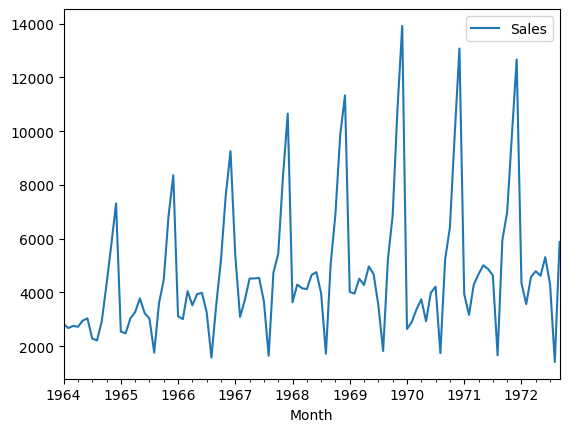

In [115]:
df.plot()

In [116]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [117]:
test_result=adfuller(df['Sales'])

In [118]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print("is non-stationary ")
    

In [119]:
adfuller_test(df['Sales'])

is non-stationary 


## Differencing ( target to make stationary)

In [120]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [121]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [122]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [123]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [124]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

is stationary


In [125]:
df['Seasonal First Difference'].dropna()

Month
1965-01-01   -274.0
1965-02-01   -197.0
1965-03-01    276.0
1965-04-01    545.0
1965-05-01    830.0
              ...  
1972-05-01   -392.0
1972-06-01    438.0
1972-07-01   -335.0
1972-08-01   -246.0
1972-09-01    -74.0
Name: Seasonal First Difference, Length: 93, dtype: float64

<Axes: xlabel='Month'>

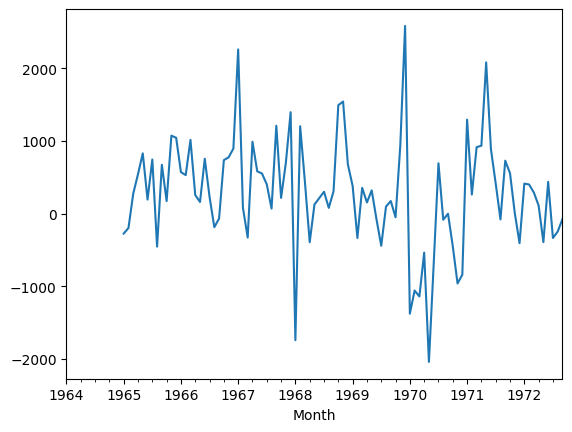

In [126]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
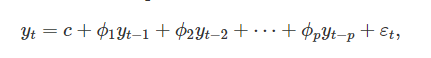

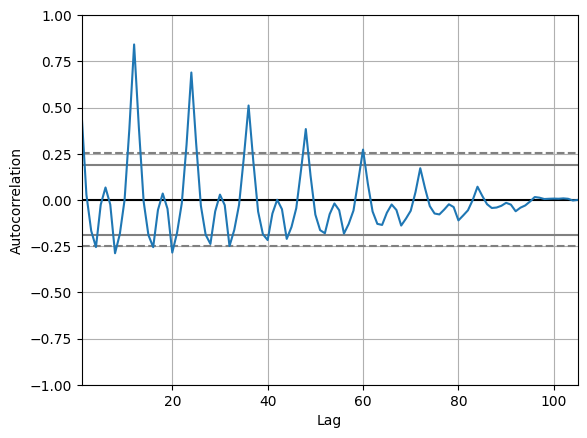

In [127]:

pd.plotting.autocorrelation_plot(df['Sales'])
plt.show()

In [128]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

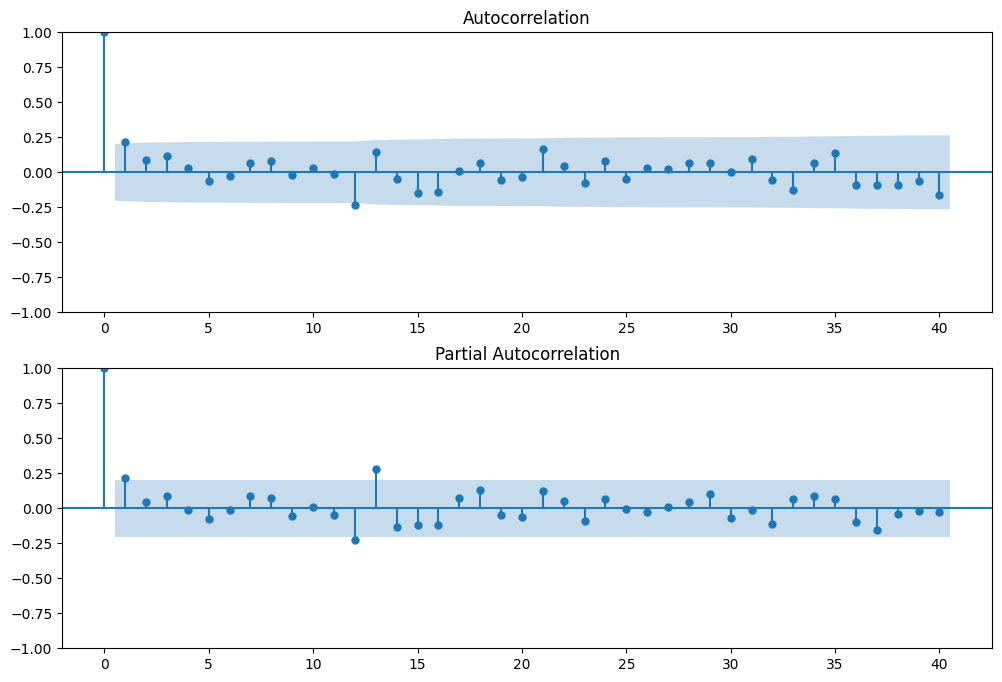

In [129]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [130]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [131]:
autoarima_model = auto_arima(df['Sales'], trace=True)
print(autoarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.132 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -966.875
Date:                Mon, 15 Jan 2024   AIC                           1935.750
Time:                        20:38:51   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                    

In [132]:
size = int(len(df) * 0.85)
train = df[:size]
test = df[size:]

In [133]:
model=SARIMAX(train['Sales'],order=(0,1,0),seasonal_order=(0,1,0,12))
results=model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Predict only test equivalent values

In [134]:
prediction=results.predict(start=len(train)+1,end=len(df),dynamic=True)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


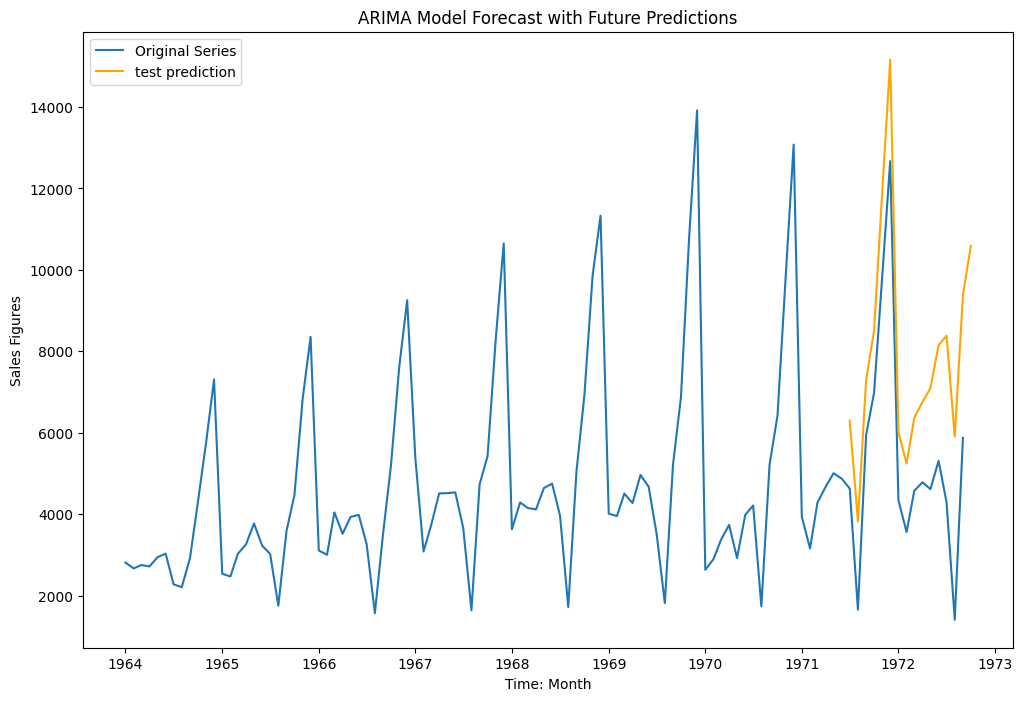

In [135]:
plt.figure(figsize=(12, 8))
plt.plot(df['Sales'], label='Original Series')
plt.plot(prediction, color='orange', label='test prediction')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()

# error calculation

In [136]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [137]:
rmse= sqrt(mean_squared_error(prediction,test['Sales']))
rmse

4085.1533860431728

# Future forecasting

In [138]:
# future_datest_df=pd.DataFrame(index=future_dates[0:])


future_datest_df=pd.date_range(start='1972-09-01',end='1974-08-01' , freq='MS')
future_datest_df=pd.DataFrame(index=future_datest_df)
# future_datest_df.head(20)

In [139]:
future_datest_df = results.predict(start = 104, end = 120, dynamic= True)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


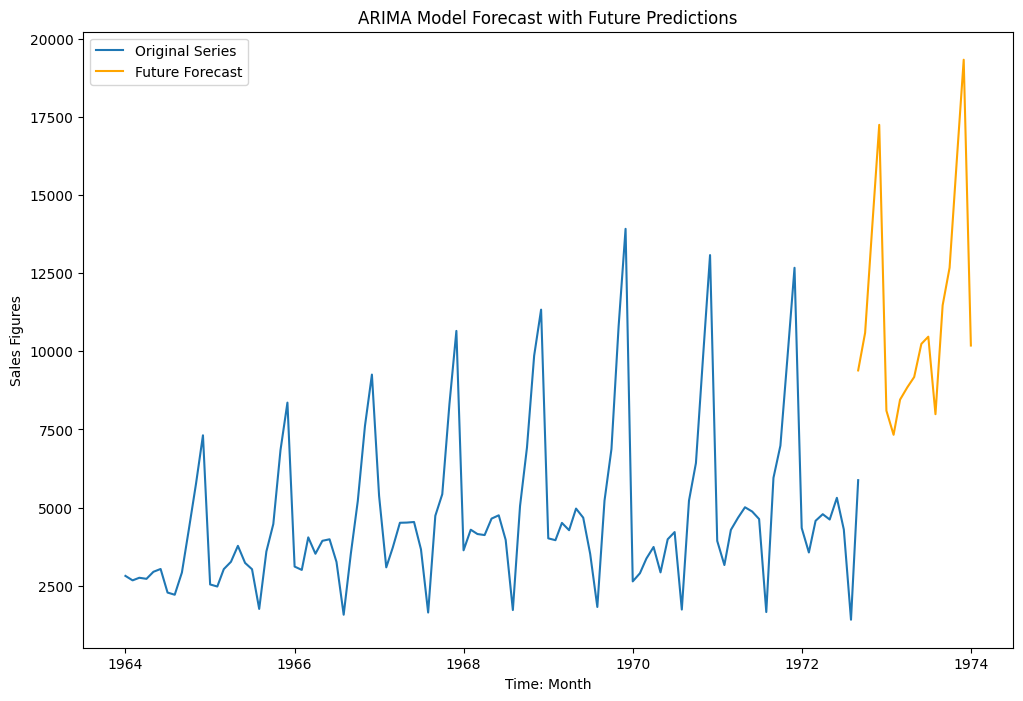

In [140]:
plt.figure(figsize=(12, 8))
plt.plot(df['Sales'], label='Original Series')
plt.plot(future_datest_df, color='orange', label='Future Forecast')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()